### DATA DESCRIPTION: 

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

* RowNumber: Row Numbers from 1 to 10000 

* CustomerId: Unique Ids for bank customer identification 

* Surname: Customer's last name 

* CreditScore: Credit score of the customer 

* Geography: The country from which the customer belongs 

* Gender: Male or Female 

* Age: Age of the customer 

* Tenure: Number of years for which the customer has been with the bank 

* Balance: Bank balance of the customer 

* NumOfProducts: Number of bank products the customer is utilising 

* HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not 

* IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not 

* EstimatedSalary: Estimated salary of the customer in Dollars 

* Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

* > Target Column Description: Exited is a class label used to divide into groups (customer closed account or not). 
 

### Read the dataset 

In [2]:
## IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 	Summarize important observations from the data set 

In [5]:
# Let's check the dimetions of the data
df.shape

(10000, 14)

In [7]:
## Checking data types of the columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.get_dtype_counts()

float64    2
int64      9
object     3
dtype: int64

* We have 9 integer columns, 2 continuous features and 3 categorical features
* But we can see in the data that a few columns have data type as numerical even though they are objects.
* We will change the data types of such columns

In [12]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

* Has Credit card is a categorical column as 'yes' 'no' values, but in our data it is given as numerica. So we will change it's datatype as object.  

In [13]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

* Is Active Member is a categorical column as 'yes' 'no' values, but in our data it is given as numerica. So we will change it's datatype as object.  

In [15]:
df['HasCrCard'] = df['HasCrCard'].astype('O')
df['IsActiveMember'] = df['IsActiveMember'].astype('O')

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

* Exited is also a categorical column as 'yes' 'no' values, but it is our target variable so I would prefer keeping it numerical. If needed we can change it later

##### We will also remove the unnecessary columns from our dataframe

In [18]:
# Surname does'nt matter while a person exits a back account.
# CustomerId and RowNumber also don't contribute to the target column
df.drop(['Surname', 'CustomerId', 'RowNumber'], axis = 1, inplace = True)

In [19]:
# Five-point statistical summary for numerical variables
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


#### Let's summarize observations for categorical variables – no. of categories, % observations in each category

In [20]:
# Let's take our categorical columns in another dataframe

df_cat = df.select_dtypes(include = [np.object])
df_cat.columns

Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype='object')

Percentage of observations in  Geography
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64



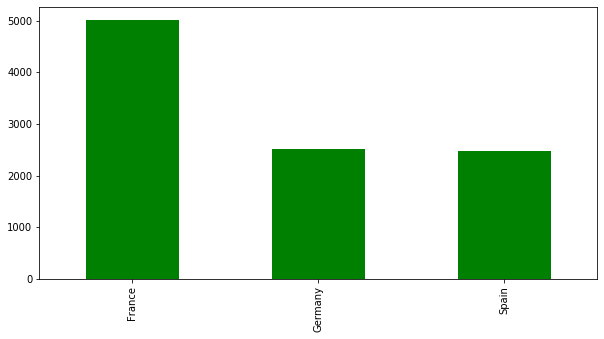

Percentage of observations in  Gender
Male      54.57
Female    45.43
Name: Gender, dtype: float64



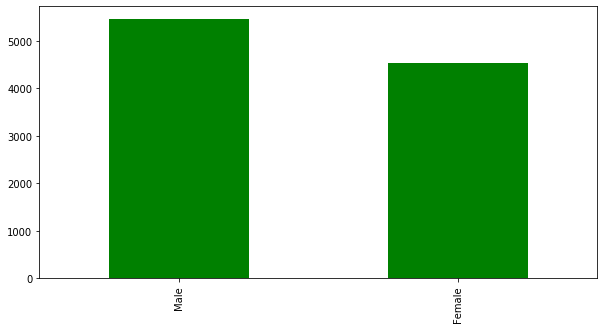

Percentage of observations in  HasCrCard
1    70.55
0    29.45
Name: HasCrCard, dtype: float64



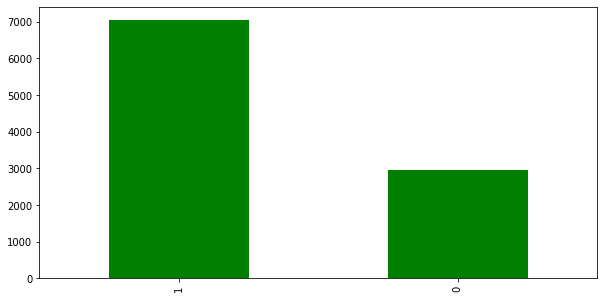

Percentage of observations in  IsActiveMember
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64



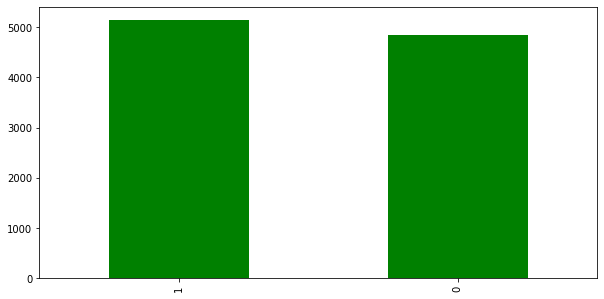

In [24]:
plt.rcParams['figure.figsize'] = (10,5)
def fig(column):
    df[i].value_counts().plot(kind = 'bar', color = 'g')
    plt.show()
    
for i in df_cat:
    print('Percentage of observations in ', i)
    print(df_cat[i].value_counts(normalize = True)*100, end = '\n\n')
    fig(i)

#### Inference

* We have 50 % of data of France followed by Germany and spain
* We have 54 % Data of males and 45 % of females
* 70% people have credit card and 30% don't have it
* 51% people are active members in our data.

### 3.	Let's check for defects in the data and perform necessary actions to ‘fix’ these defects


### Missing Values

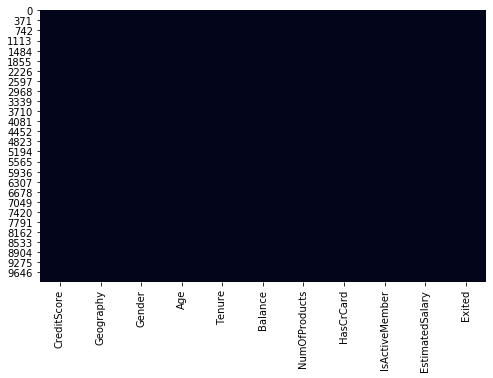

In [26]:
# Let's Visualize our null values

plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar = False);

#### Inference

* As we can see there are no null values in our data


### Let's check the outliers in the data using boxplot

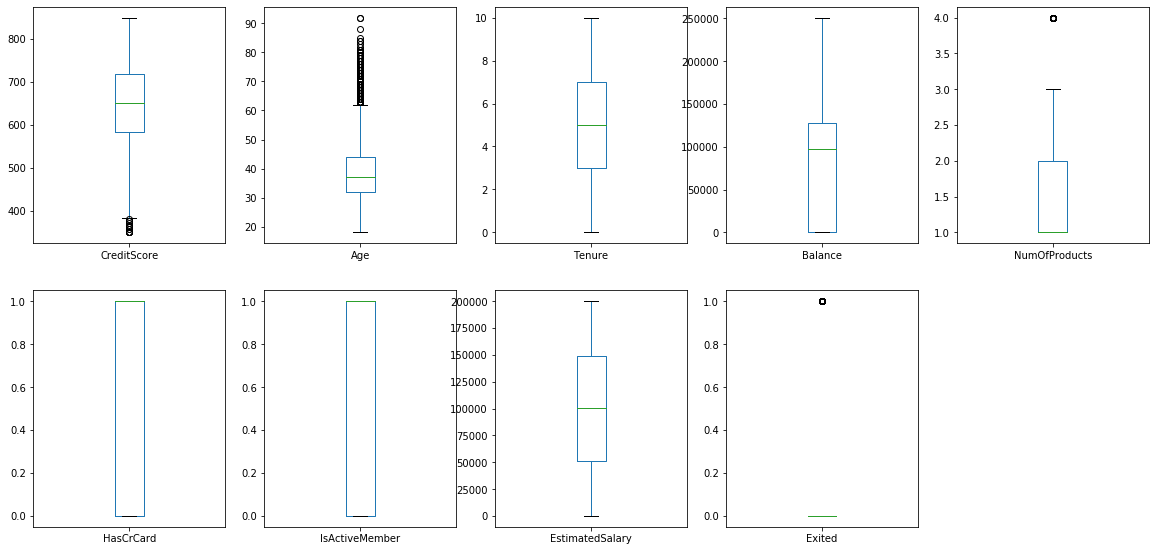

In [31]:
df.plot(kind = 'box', subplots = True, layout = (4,5), figsize = (20,20));

#### Inference

* Credit Score and Age column has many outliers.

### Checking if the Target is distributed evenly? 

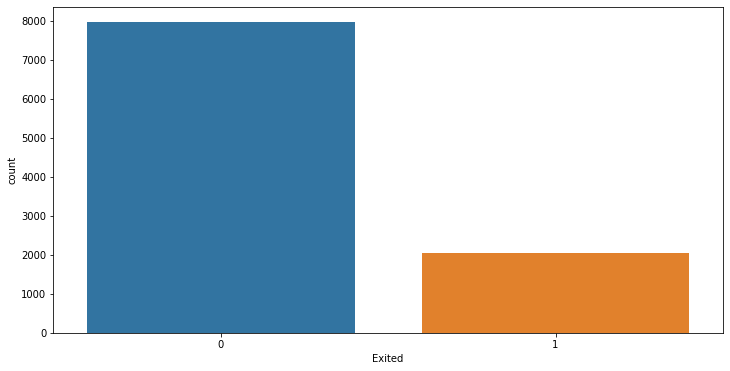

In [34]:
plt.rcParams['figure.figsize'] = (12,6)
sns.countplot(df['Exited'])
plt.show()

In [36]:
df['Exited'].value_counts(normalize = True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

##### Our data is imbalanced because our target column has more values in 0 and less in 1 which means that we have more data of the people who have not exited their account and less data of the people who have closed their account. Due to this our model will learn more attributes of the people who have not closed the account which will lead to an error later.

### We will use SMOTE technique to deal with the above problem

In [49]:
# Splitting the dependent and independent variables

X = df.drop('Exited', axis = 1)
X = pd.get_dummies(X, drop_first = True)

y = df.Exited

In [50]:
print('Before Resampling Target 1', sum(y == 1))
print('Before Resampling Target 0', sum(y == 0))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 5)
X,y = sm.fit_resample(X,y.ravel())
print('X shape', X.shape)
print('y shape', y.shape)
print('After Resampling Target 1', sum(y == 1))
print('After Resampling Target 0', sum(y == 0))

Before Resampling Target 1 2037
Before Resampling Target 0 7963
X shape (15926, 11)
y shape (15926,)
After Resampling Target 1 7963
After Resampling Target 0 7963


#### As we can see in the above output that our data has become balanced now. We can proceed further.

### Let's summarize relationships among variables           

#### Plotting countplots for categorical features. We will which are the variables most correlated or appear to be in causation with Target?

In [37]:
df_cat.columns

Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype='object')

Effect of Geography on Exited column


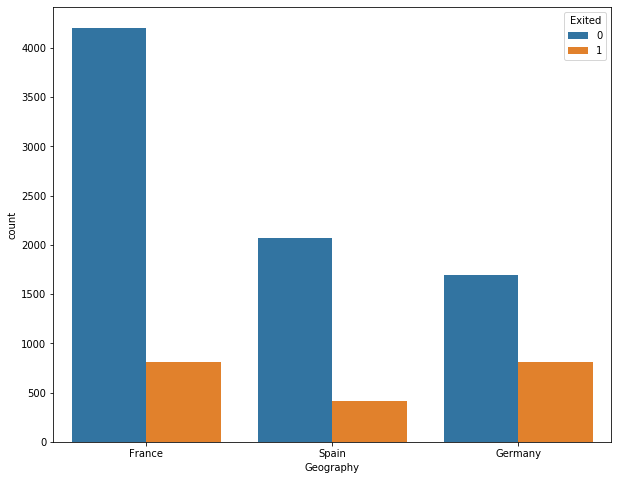

Effect of Gender on Exited column


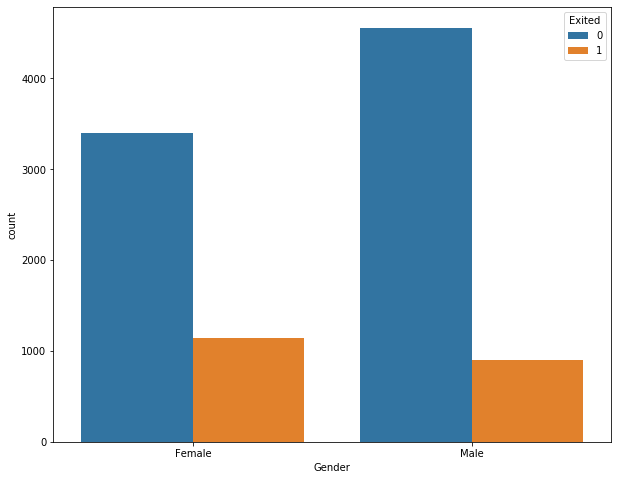

Effect of HasCrCard on Exited column


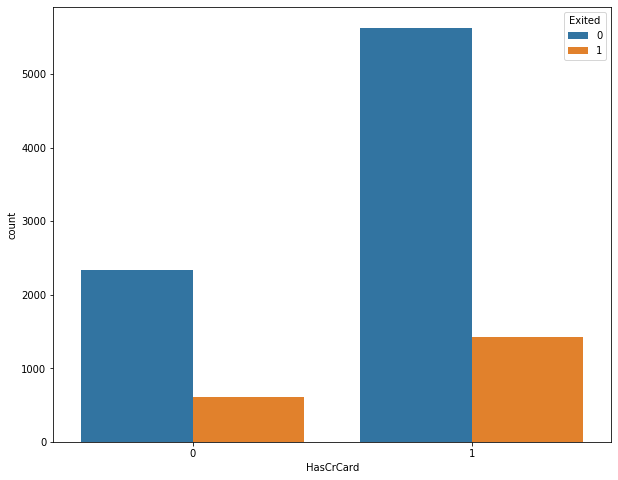

Effect of IsActiveMember on Exited column


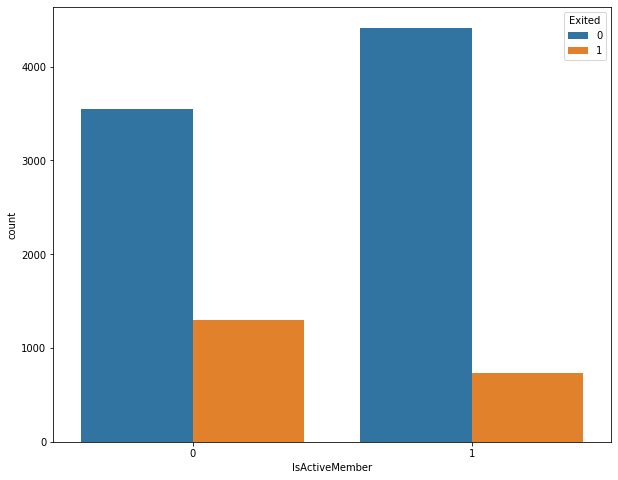

In [43]:
plt.rcParams['figure.figsize'] = (10,8)
def bar_(column):
    sns.countplot(df[i], hue = df['Exited'])
    plt.show()
    
for i in df_cat:
    print('Effect of', i , 'on Exited column')
    bar_(i)

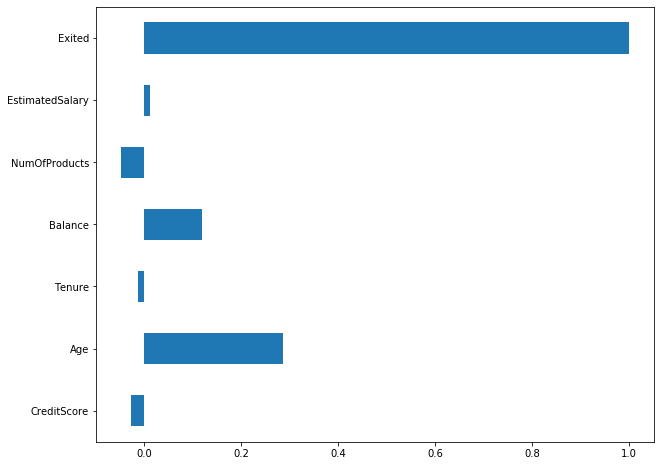

In [48]:
# Let's check the relationship of numerical features with target

corr = df.corr()
corr['Exited'].plot.barh()
plt.show()

#### Inference

* Age and balance has positive correlation with target column
* Number of Products and Credit score is negatively correlated.

###  Splitting dataset into train and test (70:30) 

In [58]:
### Initially we will work with the original data without applying SMOTE. 
### Later we will use the data on which we applied SMOTE

In [94]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma

# Splitting the dependent and independent variables

X1 = df.drop('Exited', axis = 1)
X1 = sma.add_constant(X1)
X1 = pd.get_dummies(X1, drop_first = True)

y1 = df.Exited

# Splitting the data in train and test set

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 10)

print('Shape of X_train ', X_train.shape)
print('Shape of X_test ', X_test.shape)
print('Shape of y_train ', y_train.shape)
print('Shape of y_test ', y_test.shape)

Shape of X_train  (7000, 12)
Shape of X_test  (3000, 12)
Shape of y_train  (7000,)
Shape of y_test  (3000,)


/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Let's check statistically if both train and test set are representative of the overall data.

In [95]:
X_train.describe()

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
count,7000.0,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1.0,651.208286,38.959143,4.993143,75875.851969,1.538857,99797.643837,0.249286,0.246857,0.549286,0.709429,0.515857
std,0.0,96.771898,10.601864,2.866902,62510.716344,0.585512,57456.908591,0.432630,0.431214,0.497601,0.454059,0.499784
min,1.0,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,584.000000,32.000000,3.000000,0.000000,1.000000,50650.707500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,653.000000,37.000000,5.000000,96943.320000,1.000000,99053.195000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.0,719.000000,44.000000,7.000000,127633.195000,2.000000,148639.985000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.0,850.000000,92.000000,10.000000,238387.560000,4.000000,199970.740000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
X_test.describe()

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
count,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.0,648.943333,38.834667,5.058667,77909.309700,1.510000,100772.963983,0.254667,0.249667,0.537333,0.696333,0.513333
std,0.0,96.373472,10.217932,2.950276,62119.303819,0.572138,57639.141545,0.435746,0.432892,0.498687,0.459917,0.499906
min,1.0,350.000000,18.000000,0.000000,0.000000,1.000000,106.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,582.000000,32.000000,2.000000,0.000000,1.000000,51796.032500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,650.000000,37.000000,5.000000,98086.880000,1.000000,101900.145000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.0,714.000000,44.000000,8.000000,127735.702500,2.000000,150466.517500,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.0,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


#### As we can see from the statistics of X_train and y_train, both are almost same which says that our train set and the test set are good representatives of the population data

### BASEMODEL

In [97]:
logit_model = sma.Logit(y_train, X_train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.421756
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                  0.1628
Time:                        06:58:14   Log-Likelihood:                -2952.3
converged:                       True   LL-Null:                       -3526.3
Covariance Type:            nonrobust   LLR p-value:                2.701e-239
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6932      0.295    -12.506      0.000      -4.272      -3.114
CreditScore          -0.0006      0.000     -1.692      0.091      -0.001    9.04e-05
Age                   0.0738      0.003     23.927      0.000       0.068       0.080
Tenure               -0.0087      0.011     -0.765      0.444      -0.031       0.014
Balance             2.71e-06    6.2e-07      4.369      0.000    1.49e-06    3.93e-06
NumOfProducts        -0.0623      0.056     -1.115      0.265      -0.172       0.047
EstimatedSalary    9.695e-07   5.72e-07      1.695      0.090   -1.52e-07    2.09e-06
Geography_Germany     0.8778      0.082     10.761      0.000       0.718       1.038
Geography_Spain       0.0430      0.086      0.503      0.615      -0.125       0.211
Gender_Male          -0.5361      0.066     -8.161      0.000      -0.665      -0.407
HasCrCard_1          -0.0308      0.072     -0.429      0.668      -0.171       0.110
IsActiveMember_1     -1.1000      0.070    -15.762      0.000      -1.237      -0.963
=====================================================================================
"""

#### Accuracy on test Set

In [105]:
logit_y_pred_prob = logit_model.predict(X_test)
logit_y_pred = [1 if x > 0.5 else 0 for x in logit_y_pred_prob]

In [150]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, roc_auc_score, recall_score, precision_score, roc_curve

accuracy_score(y_test, logit_y_pred)

0.8003333333333333

In [107]:
print(classification_report(y_test, logit_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2380
           1       0.55      0.20      0.29       620

    accuracy                           0.80      3000
   macro avg       0.68      0.58      0.59      3000
weighted avg       0.76      0.80      0.76      3000



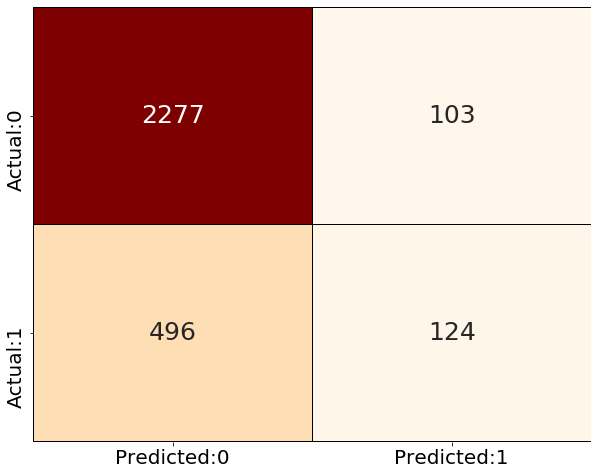

In [112]:
cm = confusion_matrix(y_test, logit_y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', 
            cbar = False, cmap = 'OrRd', linewidth = 0.3, linecolor = 'black', annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


#### Precision Score
* Precision is the Positive Predictive Value
* It is the ability of a classifier not to label an instance positive that is actually negative.
* That is the ratrio of    
True Positive/(True Positive + False Positive)

In [146]:
precision_score(y_test, logit_y_pred)

0.5462555066079295

#### Recall Score

* Recall is a True Positive Rate i.e. the ability of the classifier to find all positive instances for each class
* True Positive / (True Positive + False Negative)

In [147]:
recall_score(y_test, logit_y_pred)

0.2

#### F1 Score

* The F1 score is the weighted harmonic mean of precision and recall score such that the best score is 1 and the worst is 0.
* F1_Score = (2*Presion_Score*Recall_Score)/(Precision_Score + Recall_Score)

In [151]:
from sklearn.metrics import f1_score

f1_score(y_test, logit_y_pred)

0.2927981109799292

#### Checking the significant variables.

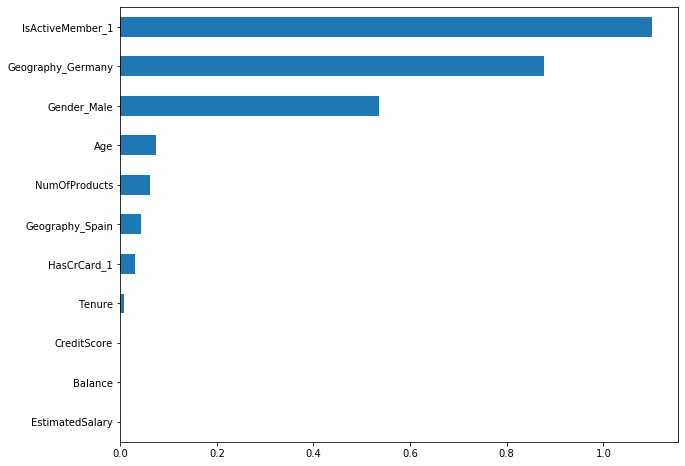

In [114]:
np.abs(logit_model.params[1:]).sort_values().plot(kind = 'barh');

#### Inference

* Is Active member is the most important feature.
* Estimated Salary, Balance, Credit Score are the least important features in the model



#### Cohen's Kappa Score
* It is a measure of inter-rater reliability. For logistic regression the actual and predicted values of the target variables are the raters

In [131]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, logit_y_pred)

0.20469834301090506

* The Cohen Kappa score of a good model is more than 0.5. 
* In our model there is no substantial agreement between the actual and predicted values. 

## We will try to improve overall efficiency of the model 


### Let us build one more model using the data with SMOTE

In [115]:
X.shape

(15926, 11)

In [116]:
y.shape

(15926,)

In [118]:

# Splitting the SMOTE data in train and test set

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size = 0.3, random_state = 10)

print('Shape of X_train_sm ', X_train_sm.shape)
print('Shape of X_test_sm ', X_test_sm.shape)
print('Shape of y_train_sm ', y_train_sm.shape)
print('Shape of y_test_sm ', y_test_sm.shape)

Shape of X_train_sm  (11148, 11)
Shape of X_test_sm  (4778, 11)
Shape of y_train_sm  (11148,)
Shape of y_test_sm  (4778,)


In [119]:
logit_model_smote = sma.Logit(y_train_sm, X_train_sm).fit()
logit_model_smote.summary()

Optimization terminated successfully.
         Current function value: 0.470909
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                11148
Model:                          Logit   Df Residuals:                    11137
Method:                           MLE   Df Model:                           10
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                  0.3206
Time:                        07:08:14   Log-Likelihood:                -5249.7
converged:                       True   LL-Null:                       -7727.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0014      0.000     -7.792      0.000      -0.002      -0.001
Age                   0.0834      0.002     34.925      0.000       0.079       0.088
Tenure               -0.0520      0.009     -5.899      0.000      -0.069      -0.035
Balance            2.962e-06   4.27e-07      6.934      0.000    2.12e-06     3.8e-06
NumOfProducts        -0.6188      0.041    -14.996      0.000      -0.700      -0.538
EstimatedSalary    4.847e-07   4.12e-07      1.176      0.240   -3.23e-07    1.29e-06
Geography_Germany     0.1912      0.061      3.127      0.002       0.071       0.311
Geography_Spain      -0.9758      0.069    -14.161      0.000      -1.111      -0.841
Gender_Male          -1.3164      0.049    -26.600      0.000      -1.413      -1.219
HasCrCard_1          -0.6898      0.050    -13.871      0.000      -0.787      -0.592
IsActiveMember_1     -1.7806      0.053    -33.573      0.000      -1.884      -1.677
=====================================================================================
"""

In [128]:
logit_sm_y_pred_prob = logit_model_smote.predict(X_test_sm)
logit_sm_y_pred = [1 if x > 0.5 else 0 for x in logit_sm_y_pred_prob]

In [129]:

accuracy_score(y_test_sm, logit_sm_y_pred)

0.7894516534114693

In [130]:
print(classification_report(y_test_sm, logit_sm_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2395
           1       0.79      0.79      0.79      2383

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



In [156]:
precision_score(y_test_sm, logit_sm_y_pred)

0.7879548306148055

In [157]:
recall_score(y_test_sm, logit_sm_y_pred)

0.7906000839278221

In [158]:
f1_score(y_test_sm, logit_sm_y_pred)

0.789275240888144

#### Inference
* We can see that there is high change in metrics on using SMOTE but this may have created an error in the data 
* When we didn't use SMOTE the accuracy was better but precision, recall and F1 scores were very low.
* There is gradual change in these scores here.
* We can say that using SMOTE has really affected the model.


***We will use different models and check the accuracy scores***

### Let us Define a Function for Confusion Matrix so than it can be used in every model

In [172]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', 
                cbar = False, cmap = 'plasma', linewidth = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

#### Create a generalised function to check the metrics for the train and the test set

In [162]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    print('Accuracy Score for train is ', accuracy_score(y_train, train_pred))
    print('Recall Score for train is ', recall_score(y_train, train_pred))
    print('Precision Score for train is ', precision_score(y_train, train_pred))
    print('F1 Score for train is ', f1_score(y_train, train_pred))
    return(classification_report(y_train, train_pred))

def get_test_report(model):
    test_pred = model.predict(X_test)
    print('Accuracy Score for test is ', accuracy_score(y_test, test_pred))
    print('Recall Score for test is ', recall_score(y_test, test_pred))
    print('Precision Score for test is ', precision_score(y_test, test_pred))
    print('F1 Score for test is ', f1_score(y_test, test_pred))
    return(classification_report(y_test, test_pred))

## Decision Tree Model

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

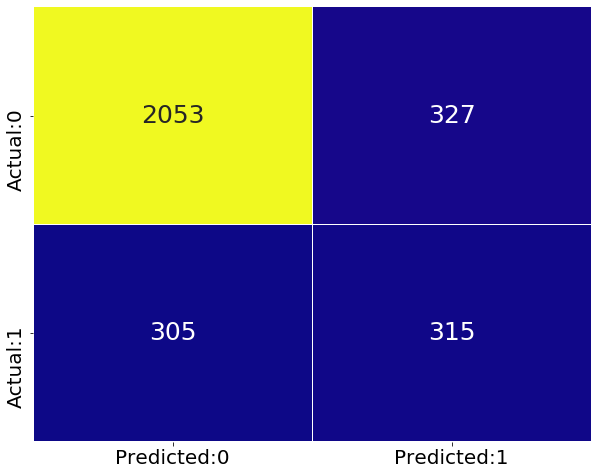

In [173]:
plot_confusion_matrix(dt_model)

In [163]:
print(get_train_report(dt_model))

Accuracy Score for train is  1.0
Recall Score for train is  1.0
Precision Score for train is  1.0
F1 Score for train is  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5583
           1       1.00      1.00      1.00      1417

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [164]:
print(get_test_report(dt_model))

Accuracy Score for test is  0.7893333333333333
Recall Score for test is  0.5080645161290323
Precision Score for test is  0.49065420560747663
F1 Score for test is  0.4992076069730586
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2380
           1       0.49      0.51      0.50       620

    accuracy                           0.79      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.79      0.79      0.79      3000



#### Inference
* Decision Tree Tends to overfit on Train Data
* It is fitting well on Test data

### Tune the Hyperparameters using GridSearchCV for Decision Tree

In [165]:
from sklearn.model_selection import GridSearchCV

tuned_params = [{'criterion': ['entropy', 'gini'],
                'max_depth' : range(2, 6),
                'max_features': ['sqrt', 'log2']}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_params, 
                        cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

tree_grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt_CV = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_features = 'sqrt')
dt_model_CV = dt_CV.fit(X_train, y_train)

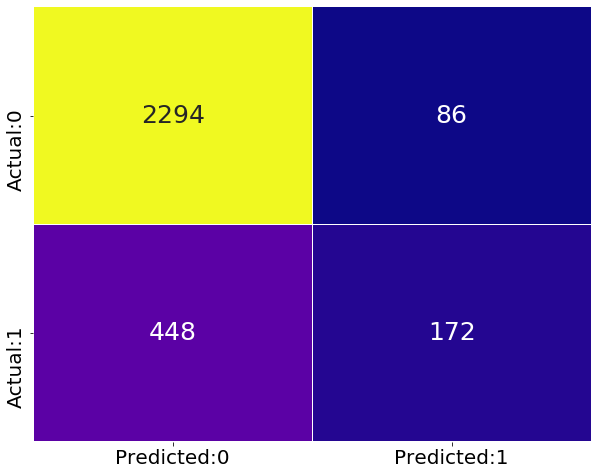

In [175]:
plot_confusion_matrix(dt_model_CV)

In [167]:
print(get_train_report(dt_model_CV))

Accuracy Score for train is  0.8401428571428572
Recall Score for train is  0.34368383909668315
Precision Score for train is  0.7204142011834319
F1 Score for train is  0.4653607262302915
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      5583
           1       0.72      0.34      0.47      1417

    accuracy                           0.84      7000
   macro avg       0.79      0.65      0.69      7000
weighted avg       0.83      0.84      0.82      7000



In [168]:
print(get_test_report(dt_model_CV))

Accuracy Score for test is  0.822
Recall Score for test is  0.27741935483870966
Precision Score for test is  0.6666666666666666
F1 Score for test is  0.3917995444191344
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2380
           1       0.67      0.28      0.39       620

    accuracy                           0.82      3000
   macro avg       0.75      0.62      0.64      3000
weighted avg       0.80      0.82      0.79      3000



#### Inference

* As we can see that after tuning our parameters the metrics scores for train data as well as test data is constant which means they are reliable.
* We will consider this as our Final Model.

In [182]:
dt_CV_d = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, max_features = 'sqrt')
dt_CV_d.fit(X1, y1)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

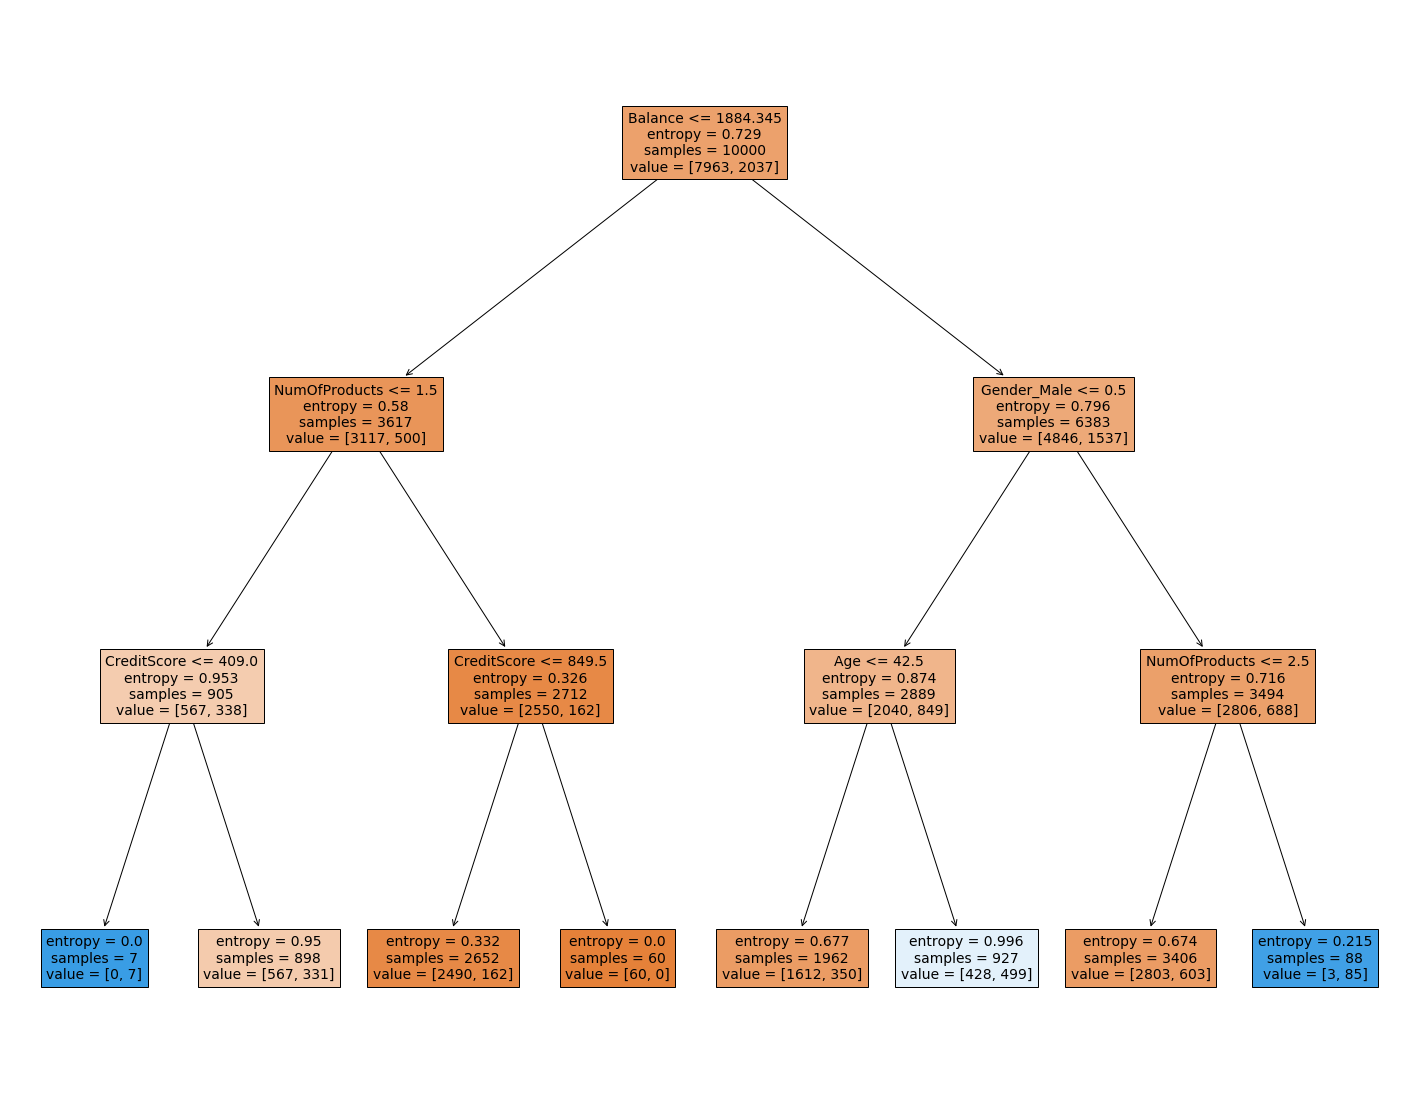

In [183]:
from sklearn import tree
text_representation = tree.export_text(dt_CV_d)

fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(dt_CV_d, feature_names = X1.columns, filled = True)

# Overall Summary of the Project

#### Summary of the Logistic Base Model

The Metrics of our base model were: 
* Accuracy Score = 0.80
* Precision Score = 0.54
* Recall Score = 02
* F1 Score = 29

These show that accuracy is good but all other scores are not performing well. 


#### Summary of logistic model on SMOTE Analysis

* Accuracy Score = 0.78
* Precision Score = 0.78
* Recall Score = 79
* F1 Score = 78
* We can see that there is high change in metrics on using SMOTE but it may have created an error in the data as we have added the data in it without knowing the actual values.
* When we didn't use SMOTE the accuracy was better but precision, recall and F1 scores were very low.
* There is gradual change in these scores after SMOTE.
* We can say that using SMOTE has really affected the model.

#### Summary of Decision Tree Model
* Decision Tree Tends to overfit on Train Data
* It is fitting well on Test data

#### Summary of Decision Tree Model after applying GridSearchCV
* Decision Tree is giving very good results after tuning the parameters. 
* It is fitting well on Tests Data as well as train data which says that this model is reliable

### Imp features for decision tree are

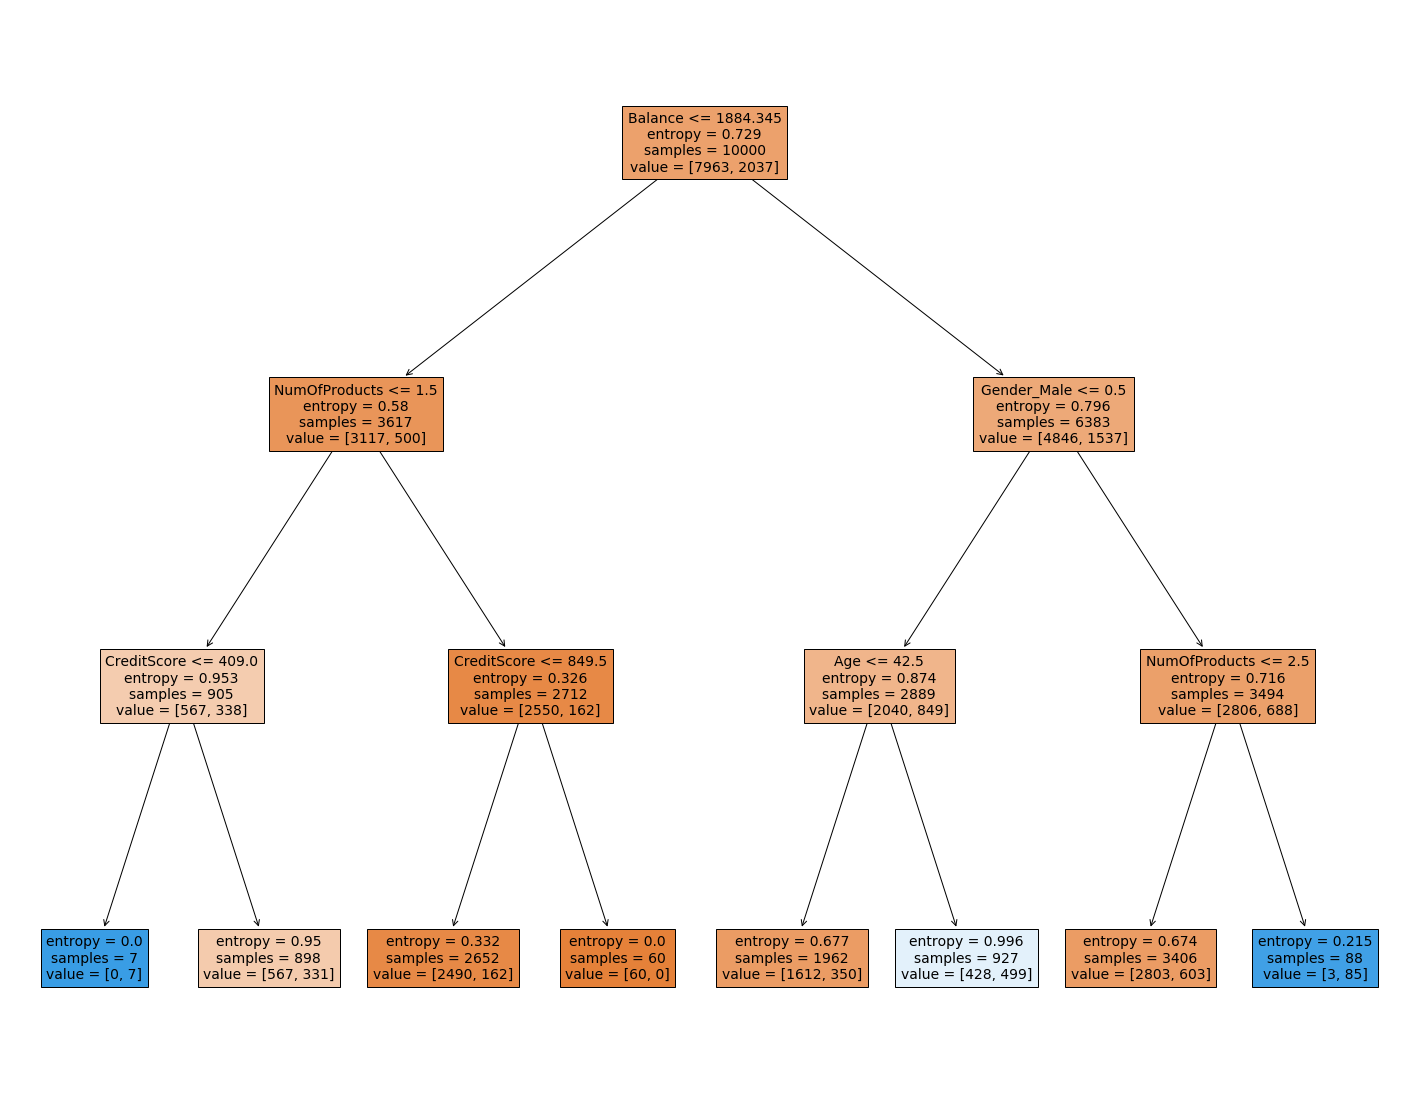

In [184]:
from sklearn import tree
text_representation = tree.export_text(dt_CV_d)

fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(dt_CV_d, feature_names = X1.columns, filled = True)

#### Inference

* As Balance feature is giving highest information gain, it has become the root node
* The branch with entropy 0 becomes root node.
* As we could see from the change in entropies i.e. information gain, the number of products and the credit scores are the important features in deciding if the customer will exis his account or not.

#### Changes from the base model

* The Base Model was Logistic Regression.
* We had to apply SMOTE Analsis for imbalance in target variable
* Then we applied Decision Tree model.
* We tuned Features using Grid Search CV for decision tree which imporoved our performance matrics.
* Got the significant features from our decision tree.

#### Key Risk

* The SMOTE Analysis may have created an error in the data as we have added the data in it without knowing the actual values.